# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Loading Data

In [4]:
lableled_df = pd.read_csv("train.csv")

# EDA

Checking file content:

In [7]:
lableled_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Training data distribution:

In [9]:
# Counting the total number of each label
counts_train = lableled_df['label'].value_counts().sort_index()
print(counts_train)

print(f"Total counts: {counts_train.sum()}")

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64
Total counts: 42000


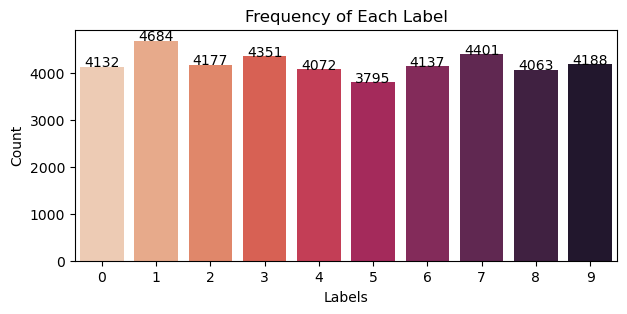

In [10]:
# Plotting frequency chart
plt.figure(figsize=(7,3))
sns.barplot(x=counts_train.index, y=counts_train.values, palette='rocket_r')

# Add count labels on top of each column
for index, value in enumerate(counts_train.values):
    plt.text(index, value + 0.05, str(value), ha='center')

# Set title and labels
plt.title('Frequency of Each Label')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

Displaying digits:

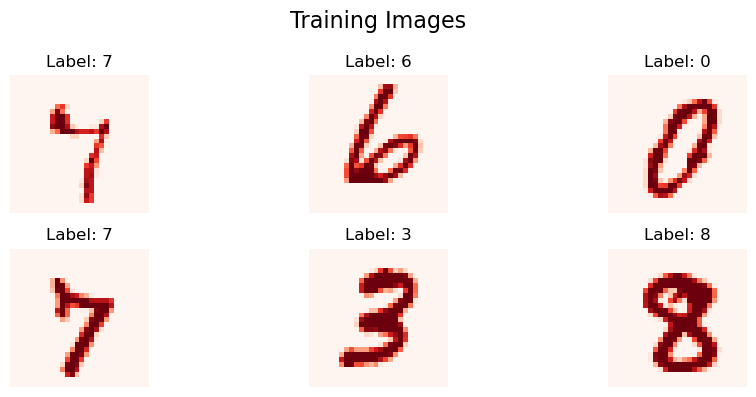

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(10, 4))
axes = axes.flatten()

for i in range(6):
    random_image = random.randint(0,lableled_df.shape[0]) 
    image = lableled_df.iloc[random_image, 1:].values
    label = lableled_df.iloc[random_image, 0]
    
    image_data = image.reshape(28, 28)
    
    axes[i-1].imshow(image_data, cmap='Reds')
    axes[i-1].set_title(f'Label: {label}')
    axes[i-1].axis('off') 

plt.suptitle("Training Images", size=16)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [14]:
# Splitting data into dependent and independent variables
X = lableled_df.drop(columns='label')
y = lableled_df['label']

In [15]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting shape
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (33600, 784)
Shape of X_test: (8400, 784)
Shape of y_train: (33600,)
Shape of y_test: (8400,)


In [16]:
# Normalizing data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# ANN Approach

In [18]:
# Building the ANN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7898 - loss: 0.6386
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9545 - loss: 0.1497
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9692 - loss: 0.1011
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9745 - loss: 0.0838
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9826 - loss: 0.0596
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9846 - loss: 0.0513
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9868 - loss: 0.0469
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9879 - loss: 0.0422
Epoch 9/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9901 - loss: 0.0350
Epoch 10/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9915 - loss: 0.0303
Epoch 11/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9916 - loss: 0.0280
Epoch 12/20
1050/1050 ━━━━━━━━

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.1775
Test loss: 0.1574677675962448
Test accuracy: 0.9764285683631897


In [22]:
# Save the trained model
model.save('ann_approach.h5')